In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /home/mateo1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mateo1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data

In [14]:
data = pd.read_csv("data/data_sample.csv")

data.head()

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
0,1963,On the order of clauses,We used to think that the output of a translat...,"Yngve, Victor H.",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
1,1963,"Connectability calculations, syntactic functio...",A program for sentence-structure determination...,"Hays, David G.",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
2,1963,A study of the combinatorial properties of {R}...,A statistical study was made of the extent to ...,"Harper, Kenneth E.",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
3,1963,Word and context association by means of linea...,This paper is concerned with the use of electr...,"Giuliano, Vincent E.",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
4,1963,La traduction automatique et l{'}enseignement ...,Les recherches effectuées depuis quelques ann...,"Gentilhomme, Yves",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS


## Sampling

In [13]:
anio_corte = 2016

len(data[data['YEAR']==anio_corte])

1817

In [15]:
paper_sample = len(data[data['YEAR']==anio_corte])
semilla = 420

data_original = data.copy() 

data_sample = data[data['YEAR']<anio_corte].sort_values('YEAR', ascending =True)
data_sample

for i in range(2016, 2023):
    data_i = data[data['YEAR']== i].sample(paper_sample, random_state= semilla) 
    
    data_sample = pd.concat([data_sample, data_i])


data_sample.to_csv('data/data_sample.csv', index = False)
data_sample.YEAR.value_counts(normalize = True)


2022    0.097332
2021    0.097332
2020    0.097332
2019    0.097332
2018    0.097332
2017    0.097332
2016    0.097332
2014    0.048264
2010    0.045747
2012    0.043122
2008    0.040872
2006    0.033962
2004    0.010767
2005    0.009749
2003    0.009428
2011    0.008839
2001    0.008464
2015    0.007982
2009    0.007446
2007    0.006160
2002    0.004714
1999    0.004339
2013    0.004232
2000    0.004232
1997    0.003375
1998    0.002732
1989    0.002518
1991    0.002411
1993    0.002303
1963    0.001821
1995    0.001768
1994    0.000643
1984    0.000643
1977    0.000589
1976    0.000536
1975    0.000375
1978    0.000321
1974    0.000268
1971    0.000054
Name: YEAR, dtype: float64

In [16]:
dataset = data_sample.ABSTRACT.tolist()
dataset[0]

'We used to think that the output of a translation machine would be stylistically inelegant, but this would be tolerable if only the message got across. We now find that getting the message across accurately is difficult, but we may be able to have stylistic elegance in the output since much of style reflects depth phenomena and thus is systematic. As an example, the order of the clauses in many twoclause sentences can be reversed without a change of meaning, but the same is not normally true of sentences with more than two clauses. The meaning usually changes when the clause order is changed. Equivalently, there appear to be severe restrictions on clause order for any given meaning. These restrictions appear to follow from depth considerations. The idea is being investigated that there is a normal depth-related clause order and any deviations from this order must be signalled by special syntactic or semantic devices. The nature of these devices is being explored. When translating mult

## Cleaning

In [17]:
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]
    
texts= [tokenize(str(doc).lower()) for doc in dataset]

In [18]:
texts_df = pd.DataFrame([' '.join(text) for text in texts], columns = ['text'])
texts_df.to_csv('data/data_clean.csv', index = False)

texts_df

,text
0,used think output translation machine would st...
1,approach study information processing verbal i...
2,establishing grammatical description language ...
3,becomes evident successful pragmatics automati...
4,exhaustive syntactic analysis using predictive...
...,...
18663,algorithmic oppression urgent persistent probl...
18664,little attention paid early rumor detection ea...
18665,report generate synthetic error dataset swedis...
18666,recent improvements automatic news summarizati...


## Word count

In [19]:
new_df = texts_df.text.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df.to_csv('data/word_count.csv', index = False)

new_df

,Word,Frequency
0,language,12867
1,model,11440
2,data,10060
3,de,10043
4,paper,9723
...,...,...
37077,rustling,1
37078,foley,1
37079,consitent,1
37080,aslex,1


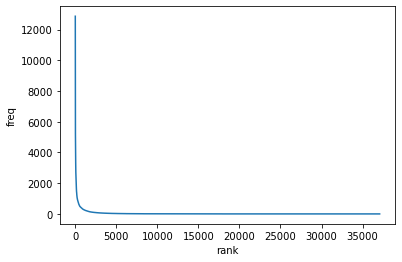

In [20]:
# plot de frecuencia vs ranking (la palabra mas frecuente tiene rank=1, la segunda tiene rank=2, etc..)
plt.plot(range(len(new_df)),new_df.Frequency)
plt.xlabel('rank');plt.ylabel('freq');

In [21]:

  # palabras con 1 sola occurrencia
print("el ",
      round(100*sum(new_df.Frequency==1)/len(new_df.Frequency),2),
      "% de las palabras aparecen 1 sola vez")

print("las 10 palabras mas frecuentes representan el ",
      round(100*new_df.Frequency[:10].sum()/new_df.Frequency.sum(),2),
      "% del corpus")



el  37.58 % de las palabras aparecen 1 sola vez
las 10 palabras mas frecuentes representan el  6.34 % del corpus
